<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn import metrics

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
cancer = df.drop('diagnosis', axis=1)
cancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Look at the shape of the dataframe:
print (cancer.shape)

(569, 32)


In [0]:
# Look for missing values:
cancer.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
# Look at the type of data froo each feature:
cancer.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

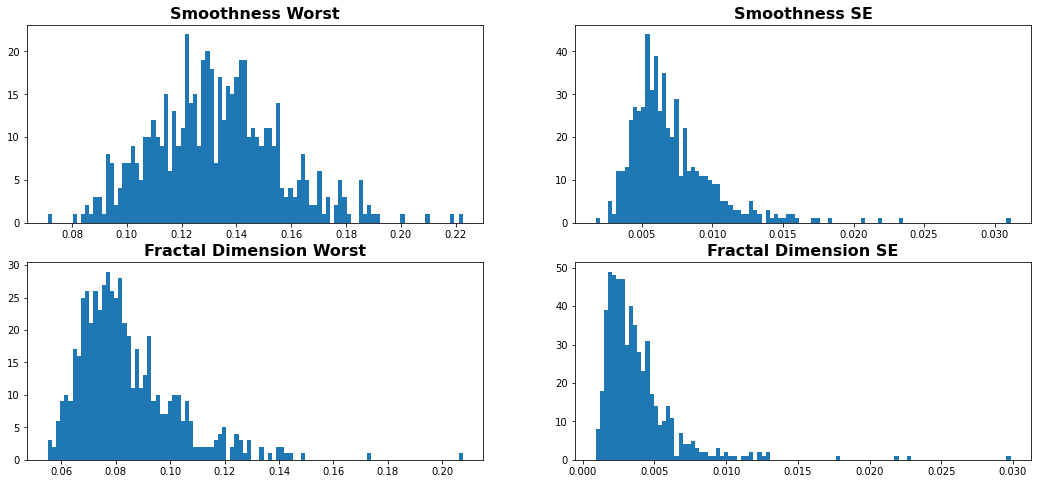

In [0]:
# Use histograms to look at different features:
f, ((ax1, ax2, ), (ax3, ax4)) = plt.subplots(2, 2, squeeze=True, 
                                           facecolor='white', figsize=(18, 8))
ax1.hist(cancer['smoothness_worst'], bins=100)
ax1.set_title('Smoothness Worst', size=16, weight='bold')
ax2.hist(cancer['smoothness_se'], bins=100)
ax2.set_title('Smoothness SE', size=16, weight='bold')
ax3.hist(cancer['fractal_dimension_worst'], bins=100)
ax3.set_title('Fractal Dimension Worst', size=16, weight='bold')
ax4.hist(cancer['fractal_dimension_se'], bins=100)
ax4.set_title('Fractal Dimension SE', size=16, weight='bold');

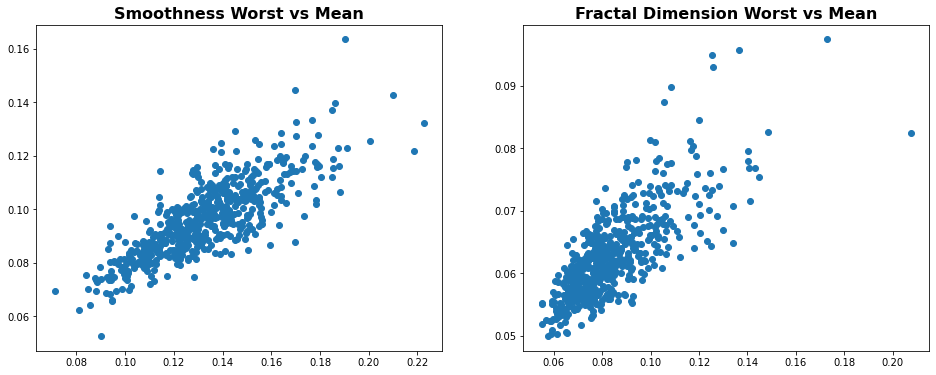

In [0]:
# Plot on a scatterplot:
f, (ax1, ax2) = plt.subplots(1, 2, facecolor='white', figsize=(16, 6))
ax1.scatter(cancer['smoothness_worst'], df['smoothness_mean'])
ax1.set_title('Smoothness Worst vs Mean', size=16, weight='bold')
ax2.scatter(cancer['fractal_dimension_worst'], df['fractal_dimension_mean'])
ax2.set_title('Fractal Dimension Worst vs Mean', size=16, weight='bold');

In [0]:
# Need to subset the dataframe for just the columns for radius:
can_sub = np.array([cancer['smoothness_worst'], cancer['fractal_dimension_worst']])

# Turn into a dataframe:
can_sub = pd.DataFrame(can_sub)

# Transpose it to read as less columns:
can_sub = can_sub.T

# Rename the columns:
can_sub.rename(columns={0:'x', 1:'y'}, inplace=True)

# View the subset dataframe:
can_sub

,x,y
0,0.16220,0.11890
1,0.12380,0.08902
2,0.14440,0.08758
3,0.20980,0.17300
4,0.13740,0.07678
...,...,...
564,0.14100,0.07115
565,0.11660,0.06637
566,0.11390,0.07820
567,0.16500,0.12400


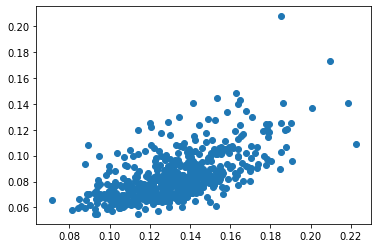

In [0]:
# Plot using a scatter plot:
plt.scatter(can_sub.x, can_sub.y);

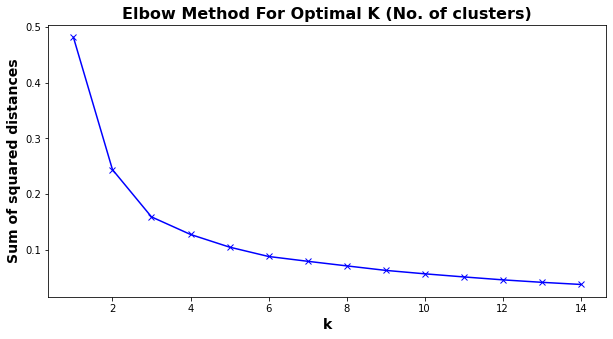

In [0]:
# Use the elbow method to find the number of clusters:
sq_dist = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(can_sub)
  sq_dist.append(km.inertia_)

# Plot the elbow method:
plt.subplots(facecolor='white', figsize=(10, 5))
plt.plot(K, sq_dist, 'bx-')
plt.xlabel('k', size=14, weight='bold')
plt.ylabel('Sum of squared distances', size=14, weight='bold')
plt.title('Elbow Method For Optimal K (No. of clusters)', size=16, weight='bold');

In [0]:
# Choose a number of clusters (Would have been better to do 3 but did 2 for the
#   sake of comparison in the next question):
km = KMeans(n_clusters=2)

In [0]:
# Fit to the data:
km.fit(can_sub)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign to a clusters to the dataframe:
can_sub['cluster'] = km.labels_
can_sub.head()

,x,y,cluster
0,0.1622,0.11890,1
1,0.1238,0.08902,0
2,0.1444,0.08758,1
3,0.2098,0.17300,1
4,0.1374,0.07678,0


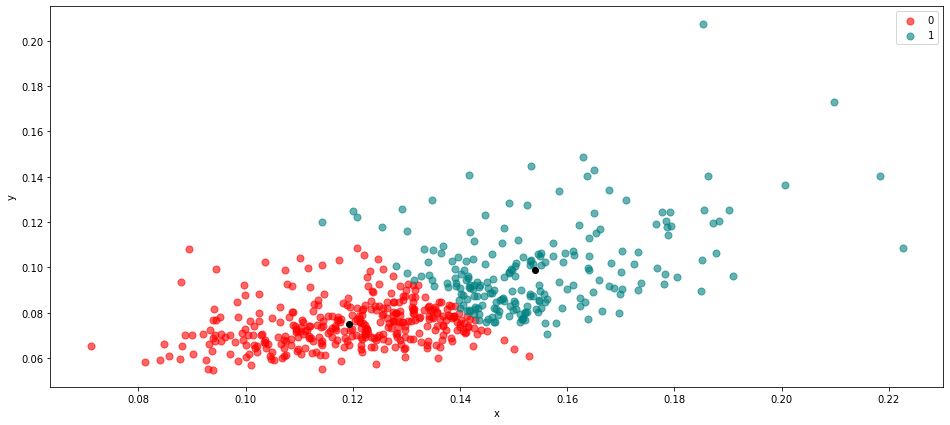

In [0]:
# Assign a variable to centroids:
cent = can_sub.groupby(can_sub['cluster']).mean()

# Display the clusters:
colors = {0:'red', 1:'teal'}
fig, ax = plt.subplots(facecolor='white', figsize=(16, 7))
ax.plot(cent['x'], cent['y'], 'ok')
grouped = can_sub.groupby(can_sub['cluster'])
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, s=50,
               color=colors[key], alpha=0.6);

In [0]:
# Get the silhouette score:
metrics.silhouette_score(can_sub.drop(columns='cluster'), km.labels_, 
                         metric='euclidean')

0.43839479656287106

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Subset the labeled features with diagnosis:
d_sub = np.array([df['smoothness_worst'], df['fractal_dimension_worst'], 
                  df['diagnosis']])

# Turn into a dataframe:
d_sub = pd.DataFrame(d_sub)

# Transpose it to read as less columns:
d_sub = d_sub.T

# Rename the columns:
d_sub.rename(columns={0:'smoothness_worst', 1:'fractal_dimension_worst', 
                      2:'diagnosis'}, inplace=True)

# View the subset dataframe:
d_sub

,smoothness_worst,fractal_dimension_worst,diagnosis
0,0.1622,0.1189,M
1,0.1238,0.08902,M
2,0.1444,0.08758,M
3,0.2098,0.173,M
4,0.1374,0.07678,M
...,...,...,...
564,0.141,0.07115,M
565,0.1166,0.06637,M
566,0.1139,0.0782,M
567,0.165,0.124,M


In [0]:
# # Change M = 1, B = 0:
# d_sub['diagnosis'] = d_sub['diagnosis'].replace({'M': 1, 'B': 0})
# d_sub

In [0]:
# Check the type of data in the dataframe:
d_sub.dtypes

smoothness_worst           object
fractal_dimension_worst    object
diagnosis                  object
dtype: object

In [0]:
# Should be floats:
d_sub['smoothness_worst'].values

array([0.1622, 0.1238, 0.1444, 0.2098, 0.1374, 0.1791, 0.1442, 0.1654,
       0.1703, 0.1853, 0.1181, 0.1396, 0.1037, 0.1131, 0.1651, 0.1678,
       0.1464, 0.1789, 0.1512, 0.14400000000000002, 0.1312, 0.1324, 0.139,
       0.1401, 0.1805, 0.1545, 0.1525, 0.1338, 0.1641, 0.1255, 0.1491,
       0.1637, 0.1634, 0.1509, 0.1446, 0.1563, 0.1446, 0.09701,
       0.09387000000000001, 0.161, 0.1094, 0.1909, 0.1247, 0.153, 0.1503,
       0.1679, 0.1297, 0.1786, 0.1494, 0.1162, 0.1085, 0.1089, 0.1144,
       0.128, 0.1389, 0.1249, 0.1624, 0.1368, 0.1021, 0.1733, 0.1275,
       0.1639, 0.16399999999999998, 0.09836, 0.1851, 0.1648, 0.1548,
       0.129, 0.1482, 0.1296, 0.1193, 0.1207, 0.1585, 0.1411, 0.1176,
       0.15, 0.1451, 0.1478, 0.1639, 0.1289, 0.1557, 0.1536, 0.1573,
       0.1392, 0.1377, 0.1398, 0.1306, 0.1249, 0.1304, 0.1277, 0.1115,
       0.1257, 0.1006, 0.1339, 0.1551, 0.11900000000000001, 0.114, 0.1316,
       0.1431, 0.1431, 0.1265, 0.1584, 0.1123, 0.1559, 0.1219, 0.1862,
       0

In [0]:
# Should be floats:
d_sub['fractal_dimension_worst'].values

array([0.1189, 0.08902, 0.08757999999999999, 0.17300000000000001, 0.07678,
       0.1244, 0.08367999999999999, 0.1151, 0.1072, 0.2075, 0.08452,
       0.1048, 0.1023, 0.06287000000000001, 0.1431, 0.1341, 0.08216,
       0.1142, 0.07615, 0.07259, 0.08183, 0.07773, 0.09946,
       0.07526000000000001, 0.09564, 0.1059, 0.1275, 0.07421, 0.09876,
       0.07919, 0.09782, 0.1402, 0.08482, 0.1123, 0.1233,
       0.08632999999999999, 0.1014, 0.061689999999999995, 0.05504, 0.1071,
       0.07146, 0.09606, 0.1038, 0.1027, 0.09618, 0.09185, 0.07409,
       0.1179, 0.08301, 0.06917000000000001, 0.06563, 0.08025, 0.07408,
       0.07987000000000001, 0.07873, 0.07036, 0.08294, 0.1094, 0.06289,
       0.09026, 0.0802, 0.07712000000000001, 0.1132, 0.0849, 0.1031,
       0.08911000000000001, 0.09211, 0.06641, 0.1175, 0.0641, 0.06589,
       0.1084, 0.1339, 0.10300000000000001, 0.07608999999999999,
       0.06387000000000001, 0.07191, 0.1108, 0.09963999999999999, 0.07918,
       0.08851, 0.1016, 0.1051,

In [0]:
# Need to remove leading spaces:
# d_sub['fractal_dimension_worst'] = d_sub['fractal_dimension_worst'].str.strip('')
# d_sub['smoothness_worst'] = d_sub['smoothness_worst'].str.strip('')
d_sub['fractal_dimension_worst'] = d_sub['fractal_dimension_worst'].astype('float')
d_sub['smoothness_worst'] = d_sub['smoothness_worst'].astype('float')
d_sub.dtypes

smoothness_worst           float64
fractal_dimension_worst    float64
diagnosis                   object
dtype: object

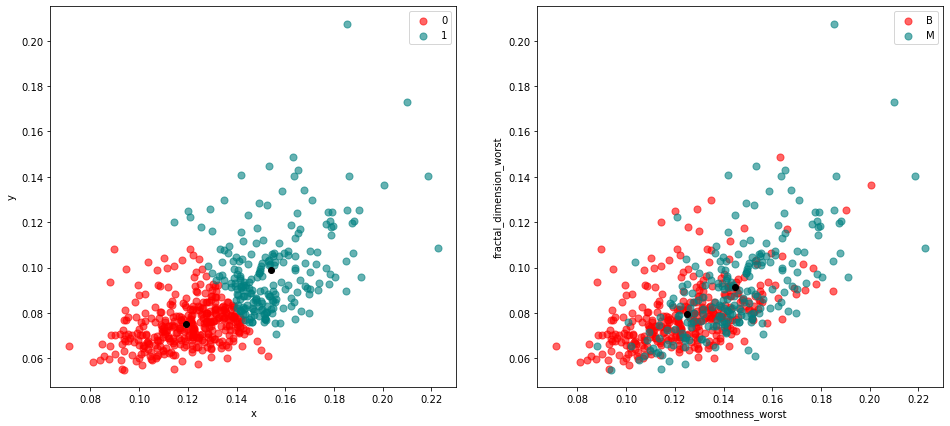

In [0]:
# Assign a variable to centroids:
cent1 = can_sub.groupby(can_sub['cluster']).mean()
cent2 = d_sub.groupby(d_sub['diagnosis']).mean()

# Display the clusters:
colors1 = {0:'red', 1:'teal'}
colors2 = {'B':'red', 'M':'teal'}
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='white', figsize=(16, 7))
ax1.plot(cent1['x'], cent1['y'], 'ok')
grouped1 = can_sub.groupby(can_sub['cluster'])
for key, group in grouped1:
    group.plot(ax=ax1, kind='scatter', x='x', y='y', label=key, s=50,
               color=colors1[key], alpha=0.6)
ax2.plot(cent2['smoothness_worst'], cent2['fractal_dimension_worst'], 'ok')
grouped2 = d_sub.groupby(d_sub['diagnosis'])
for key, group in grouped2:
    group.plot(ax=ax2, kind='scatter', x='smoothness_worst', 
               y='fractal_dimension_worst', label=key, s=50,
               color=colors2[key], alpha=0.6);

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
# Look at the dataframe:
print (df.shape)
df.head(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [0]:
# Look at the data types of the dataframe:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
# Check for missing values:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
# Make a copy of the dataframe:
can_processed = df.copy()

# The only column that holds missing values is the Unnamed: 32 column. 
# All of the values in this column are missing, so do not need this column:
can_processed.drop(columns=['Unnamed: 32'], inplace=True)

# Check my work:
can_processed.isnull().sum().any()

False

In [0]:
# Seperate categorical and numeric columns:
cat_cols = can_processed.columns[can_processed.dtypes=='object']
num_cols = can_processed.columns[can_processed.dtypes!='object']

# Look at the number of categorical and numeric columns:
print (f'{len(cat_cols)} Categorical Columns')
print (f'{len(num_cols)} Numerical Columns')

1 Categorical Columns
31 Numerical Columns


In [0]:
# Cast categorical columns to category data type:
can_processed[cat_cols] = can_processed[cat_cols].astype('category')
can_processed.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

In [0]:
# Replace all category cell values with their numeric category codes:
for col in cat_cols:
  can_processed[col] = can_processed[col].cat.codes

print (can_processed.shape)
can_processed.sample(10)

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
513,915940,0,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,0.4165,0.6237,2.5610,37.11,0.004953,0.01812,0.030350,0.008648,0.01539,0.002281,16.76,17.24,108.50,862.0,0.1223,0.1928,0.24920,0.09186,0.2626,0.07048
206,879804,0,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,0.2137,1.3420,1.5170,12.33,0.009719,0.01249,0.007975,0.007527,0.02210,0.002472,10.42,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380
487,913505,1,19.440,18.82,128.10,1167.0,0.10890,0.14480,0.22560,0.11940,0.1823,0.06115,0.5659,1.4080,3.6310,67.74,0.005288,0.02833,0.042560,0.011760,0.01717,0.003211,23.96,30.39,153.90,1740.0,0.1514,0.3725,0.59360,0.20600,0.3266,0.09009
479,911916,1,16.250,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,0.06578,0.3147,0.9857,3.0700,33.12,0.009197,0.05470,0.080790,0.022150,0.02773,0.006355,17.39,23.05,122.10,939.7,0.1377,0.4462,0.58970,0.17750,0.3318,0.09136
199,877500,1,14.450,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,0.2092,0.6509,1.4460,19.42,0.004044,0.01597,0.020000,0.007303,0.01522,0.001976,18.33,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130
463,911320501,0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,0.1816,0.7656,1.3030,12.89,0.006709,0.01701,0.020800,0.007497,0.02124,0.002768,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
440,909411,0,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,0.2574,1.3760,2.8060,18.15,0.008565,0.04638,0.064300,0.017680,0.01516,0.004976,12.36,26.87,90.14,476.4,0.1391,0.4082,0.47790,0.15550,0.2540,0.09532
21,8510824,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.9090,15.70,0.009606,0.01432,0.019850,0.014210,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773
506,91544001,0,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,0.1811,0.7959,0.9857,12.58,0.006272,0.02198,0.039660,0.009894,0.01320,0.003813,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
156,8711202,1,17.680,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,0.1971,0.06166,0.8113,1.4000,5.5400,93.91,0.009037,0.04954,0.052060,0.018410,0.01778,0.004968,20.47,25.11,132.90,1302.0,0.1418,0.3498,0.35830,0.15150,0.2463,0.07738


In [0]:
# Should only have numeric columns now:
can_processed.dtypes

id                           int64
diagnosis                     int8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
# Import StandardScaler and PCA from sklearn:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a variable for all the feature columns minus the 'id' and 'diagnosis' columns:
f_cols = can_processed.columns[2:]

# Create a variable for standardizing the features:
x = can_processed.loc[:, f_cols].values

# Use the scaler to fit and transform the data:
x = StandardScaler().fit_transform(x)

# Check whether the data is normalized:
print('{:.2f}'.format(np.mean(x)))
print(np.std(x))

0.00
1.0


In [0]:
# Convert the normalized features into a dataframe:
can_pro_norm = pd.DataFrame(x, columns=f_cols)

In [0]:
# Intialise the PCA model:
mypca = PCA(n_components=2)

# Fit the mypca model to the dataframe:
can_pro_2d = mypca.fit_transform(x)

In [0]:
# See how much variation did each PCA explain?
print ('Variance Ratio per Feature: ', mypca.explained_variance_ratio_)

# What is the total variance?
print ('Total Variance: ', sum(mypca.explained_variance_ratio_))

# How much informtion do I loose?
print ('Information Lost: ', 1-sum(mypca.explained_variance_ratio_))

Variance Ratio per Feature:  [0.44272026 0.18971182]
Total Variance:  0.6324320765155943
Information Lost:  0.3675679234844057


In [0]:
# Turn that into a dataframe:
can_final = pd.DataFrame(can_pro_2d, columns=['PC1', 'PC2'])
can_final['diagnosis'] = can_processed['diagnosis']
can_final.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,1
1,2.387802,-3.768172,1
2,5.733896,-1.075174,1
3,7.122953,10.275589,1
4,3.935302,-1.948072,1


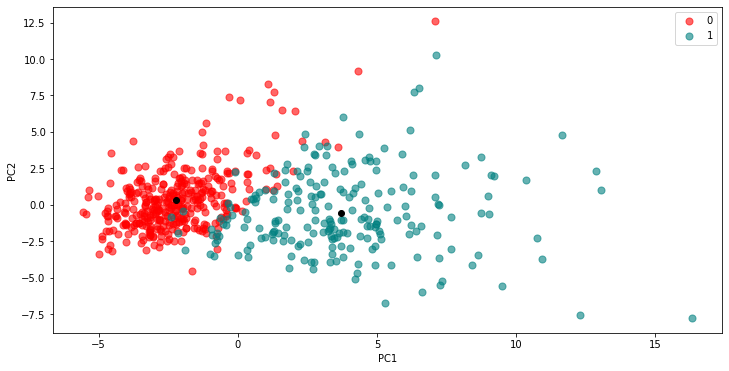

In [0]:
# Assign a variable to centroids:
cent = can_final.groupby(can_final['diagnosis']).mean()

# Display the clusters:
colors = {0:'red', 1:'teal'}
fig, ax = plt.subplots(facecolor='white', figsize=(12, 6))
ax.plot(cent['PC1'], cent['PC2'], 'ok')
grouped = can_final.groupby(can_final['diagnosis'])
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='PC1', y='PC2', label=key, s=50,
               color=colors[key], alpha=0.6);

In [0]:
# Intialise the PCA model:
mypca = PCA(n_components=10)

# Fit the mypca model to the dataframe:
can_pro_pca = mypca.fit_transform(x)

In [0]:
# Define the number of components:
num_comp = len(mypca.explained_variance_ratio_)
num_comp

10

In [0]:
# Create a nuumpy array as long as the number of components:
ind = np.arange(num_comp)
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# Define a scree plot function:
def scree_plot(pca):
  vals = mypca.explained_variance_ratio_
  plt.figure(facecolor='white', figsize=(16, 6))
  ax = plt.subplot(111)
  cumvals = np.cumsum(vals)
  ax.bar(ind, vals)
  ax.plot(ind, cumvals, c='r')
  for i in range(num_comp):
    ax.annotate(r'%s' % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va='bottom',
                ha='center', fontsize=10)
  ax.xaxis.set_tick_params(width=0)
  ax.yaxis.set_tick_params(width=2, length=12)
  ax.set_xlabel('Principal Component')
  ax.set_ylabel('Variance Explained (%)')
  plt.title('Explained Variance Per Principal Component');

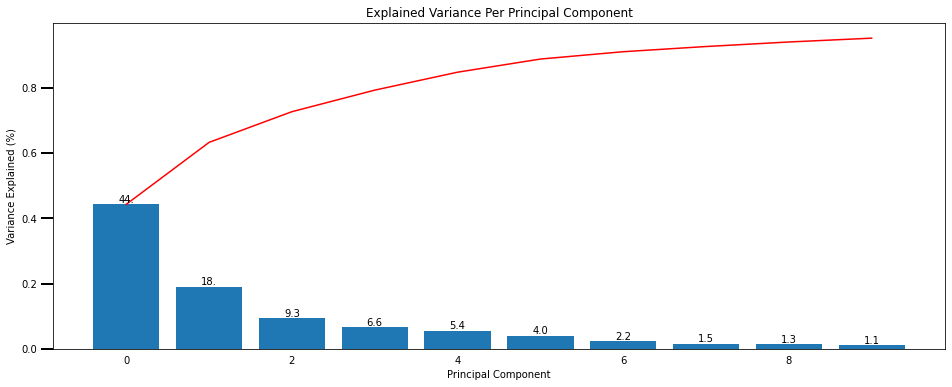

In [0]:
# Apply the scree plot function:
scree_plot(mypca)

In [0]:
# Intialise the PCA model:
mypca = PCA(n_components=7)

# Fit the mypca model to the dataframe:
can_pro_6d = mypca.fit_transform(x)

In [0]:
# Define the number of components:
num_comp = len(mypca.explained_variance_ratio_)
num_comp

7

In [0]:
# Create a nuumpy array as long as the number of components:
ind = np.arange(num_comp)
ind

array([0, 1, 2, 3, 4, 5, 6])

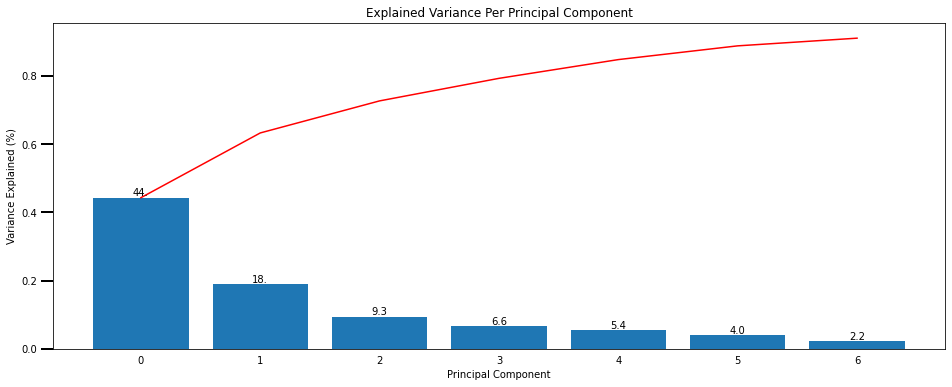

In [0]:
# Apply my scree plot function to new PCA:
scree_plot(mypca)

In [0]:
# See how much variation did each PCA explain?
print ('Variance Ratio per Feature: ', mypca.explained_variance_ratio_)

# What is the total variance?
print ('Total Variance: ', sum(mypca.explained_variance_ratio_))

# How much informtion do I loose?
print ('Information Lost: ', 1-sum(mypca.explained_variance_ratio_))

Variance Ratio per Feature:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Total Variance:  0.9100953006957264
Information Lost:  0.08990469930427358


- Need to have 7 principal components in order to retain at least 90% of variation of the original dataset.

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge  **<--------- Doing this!**
- Work on your Data Storytelling Project